<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Prueba_de_los_Promedios_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba de los promedios**

Es una prueba que nos sirve para verificar que la muestra $x_i$ proviene de una distrubución $U(0,1)$

In [1]:
import scipy.stats as st   #calcular el valor de l estadistico za/2
import numpy as np
import tabulate
import matplotlib.pyplot as plt

Prueba estadisticas para los números pseudoaleatorios.
Para esto podemos plantear una prueba de hipotesis de promedios donde probaremos que los números generados provienen de un universo uniforme con media de 0.5.

Establecemos una hipotesis nula $H_0$ la cual se debe de probar y una hipotesis alternativa  $H_a$ (hipotesis de investigación) describira lo que se concluirá si se rechaza la hipotesis nula

Las hipotesis son:

Hipotesis nula: $$H_0:u=\frac{1}{2}$$
Hipotesis alternativa: $$H_a: u\neq \frac{1}{2}$$

Promedio muestral: $$
\bar{x} = \frac{U_1+U_2+...+U_N}{N}
$$

Estadístico de prueba $Z_0$:
$$Z_0 = \frac{(\bar{x} - 0.5)\sqrt{N}}{\sqrt{\frac{1}{12}}}$$
Donde 0.5 es la media de una distribución $U(0,1)$ y $1/12$ es la varianza

In [2]:
data = [     #Ingresamos lo datos de la tabla 3.1
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79118, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73485, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]


In [3]:
def promedio(data, alfa):     #Definimos promedio con los datos de la muesta y el nivel de significacnia

  x= np.mean(data)            #Calculamos el promedio muestra
  N=len(data)                 #Indicamos el tamaño de la muestra con las datos previamente definidos

  z=(x-0.5)*np.sqrt(N)/np.sqrt(1/12)  #Calculamos ell estadistico z_0

  z_c = st.norm.ppf(1-alfa/2)         #Calculamos el valor crítico

  if abs(z)<z_c:
    print("No se rechaza H_0: La muestra proviene de una distribución U(0,1)" )
  else:
    print("SE rechaza H_0: La muestra proviene de una distribución U(0,1)")

  return x, z, z_c

In [4]:
x, z, z_c = promedio(data, 0.05)  #Calculamos el promedio, indicando alfa=0.05
print(x)
print(z)
print(z_c)

No se rechaza H_0: La muestra proviene de una distribución U(0,1)
0.4823493
-0.6114381837831203
1.959963984540054


Luego calculamos la frecuencia

In [5]:
intervalos = [(0,0.2), (0.2,0.4), (0.4,0.6), (0.6,0.8), (0.8,1.0)] #Definimos los intervalos como lo vimos en clase
k = len(intervalos)     #Guardamos los itervalos
N = len(data)           #Guardamos los datos

Frecuencia observada $f_o$

In [6]:
fo = [0]*k    # Indicamos cuantos datos caen en cada intervalo
for x in data:
    for i, (a,b) in enumerate(intervalos):
        if (a <= x < b) or (i == k-1 and x == b):
            fo[i] += 1
            break

Para la frecuencia esperada $f_e$

Para uniforme: $$f_e=\frac{N}{k}$$

In [7]:
fe = [N/k]*k

En la prueba de frecuncias, el estadístico es: $$X^2=\sum \frac{{f_o-f_e}^2}{f_e}$$

In [8]:
x_p = []

for i in range(k):
    valor = (fo[i] - fe[i])**2 / fe[i]
    x_p.append(valor)
x2 = sum(x_p)

In [9]:
tabla = []    #Construimos nuestra tabla

for i in range(k):    #Indicamos la lista de filas
    a, b = intervalos[i]
    tabla.append([
        f"[{a:.1f}, {b:.1f})" if i < k-1 else f"[{a:.1f}, {b:.1f}]",
        fo[i],
        round(fe[i], 2),
        round(x_p[i], 4)
    ])

Imprimimos nuestra tabal con los datos previamenete calculados

In [10]:
encabezados = ["Intervalo", "fo", "fe", "(fo-fe)^2 / fe"]

print(tabulate.tabulate(tabla, headers=encabezados, tablefmt="fancy_grid"))
print("\nX^2 =", round(x2, 4))

╒═════════════╤══════╤══════╤══════════════════╕
│ Intervalo   │   fo │   fe │   (fo-fe)^2 / fe │
╞═════════════╪══════╪══════╪══════════════════╡
│ [0.0, 0.2)  │   21 │   20 │             0.05 │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.2, 0.4)  │   22 │   20 │             0.2  │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.4, 0.6)  │   19 │   20 │             0.05 │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.6, 0.8)  │   23 │   20 │             0.45 │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.8, 1.0]  │   15 │   20 │             1.25 │
╘═════════════╧══════╧══════╧══════════════════╛

X^2 = 2.0


Y la grafica queda de la siguiente manera

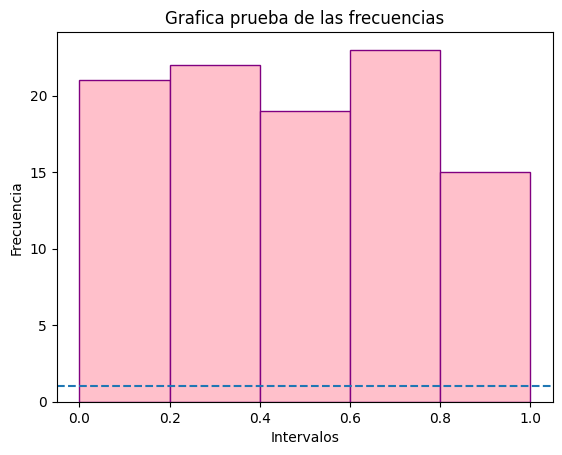

In [11]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

plt.figure()
plt.hist(data, bins=bins, color="pink", edgecolor="purple")
plt.axhline(1, linestyle='--')  # densidad teórica U(0,1)
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.title("Grafica prueba de las frecuencias")
plt.show()

Ahora graficamos de forma empírica que es la prueba de Kalmogorov-Smirnov

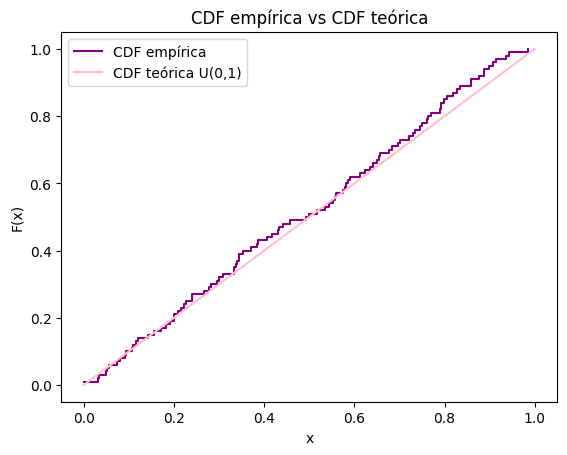

In [12]:
data_ord = np.sort(data)
y = np.arange(1, N+1) / N

plt.figure()
plt.step(data_ord, y, color="purple",where="post", label="CDF empírica")

x_teo = np.linspace(0,1,200)
plt.plot(x_teo, x_teo, color="pink", label="CDF teórica U(0,1)")

plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("CDF empírica vs CDF teórica")
plt.legend()
plt.show()

En esta parte fue una idea de poder graficarlo de manera diferente, aunque no sea por los parametros indicados en clase

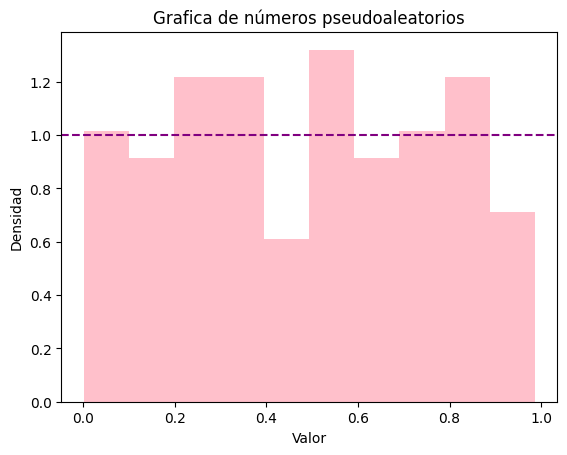

In [13]:
import matplotlib.pyplot as plt

# Datos
U = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79118, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73485, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]


plt.figure()
plt.hist(U, color="pink", bins=10, density=True)
plt.axhline(1, color="purple", linestyle='--')  # densidad teórica U(0,1)
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Grafica de números pseudoaleatorios")
plt.show()


